In [2]:
###########################################################################
#Developed by Jonathan Ojeda 29/1/2021 QAAFI UQ
# Code functionalities:
# Read netCDF using xarray
# Explore and plot multidimensional files using xarray 
# Create maps using xarray and dataframes
# Create 2D dataframe from xarray
# Create Multi-dimensional xarray from 2D pandas dataframe
###########################################################################

In [1]:
#Required packages
import os
os.environ["PROJ_LIB"] = r'C:\Users\uqjojeda\Anaconda3\Library\share'; #fixr
from netCDF4 import Dataset
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
import matplotlib.ticker as ticker
import glob

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Tool to minimize code and see only figures

from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

In [393]:
#Read different outputs:
#run005 --> harvesting at 200 DAS
#run004 --> harvesting at 300 degre days after flowering
#r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\output.nc4' --> harvesting at 150 DAS
#run007 --> harvesting at 120 DAS
#run008 --> harvesting at 120 DAS withouth crop mask

#Read and merge all nc files from psims (if more than a file in a folder write *.nc4 at the end of the address)
df_final = xr.merge([xr.open_dataset(f, decode_times=False) for f in glob.glob(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\new\run009\output.nc4')])

In [551]:
#df_final.to_netcdf(r'C:/Users/uqjojeda/Nextcloud/PURTERRA-A0131/2020/outputs/new/run00/all_final.nc')

In [390]:
df_final

<xarray.Dataset>
Dimensions:          (irr: 2, lat: 52, lon: 68, scen_new: 4, time: 30)
Coordinates:
  * irr              (irr) int32 1 2
  * lat              (lat) float64 49.75 49.25 48.75 48.25 ... 25.25 24.75 24.25
  * lon              (lon) float64 -105.8 -105.2 -104.8 ... -73.25 -72.75 -72.25
  * time             (time) int32 1 2 3 4 5 6 7 8 9 ... 23 24 25 26 27 28 29 30
Dimensions without coordinates: scen_new
Data variables:
    DaysAfterSowing  (time, scen_new, irr, lon, lat) float32 ...
    ExtinctionCoef   (time, scen_new, irr, lon, lat) float32 ...
    FertiliserIn     (time, scen_new, irr, lon, lat) float32 ...
    FloweringDAS     (time, scen_new, irr, lon, lat) float32 ...
    IrrigationIn     (time, scen_new, irr, lon, lat) float32 ...
    LeafNo           (time, scen_new, irr, lon, lat) float32 ...
    MaxLAI           (time, scen_new, irr, lon, lat) float32 ...
    PAWC             (time, scen_new, irr, lon, lat) float32 ...
    RadiationIn      (time, scen_new, irr, lon, lat) float32 ...
    RainIn           (time, scen_new, irr, lon, lat) float32 ...
    TempIn           (time, scen_new, irr, lon, lat) float32 ...
    WU               (time, scen_new, irr, lon, lat) float32 ...
    aMaxT            (time, scen_new, irr, lon, lat) float32 ...
    aMinT            (time, scen_new, irr, lon, lat) float32 ...
    actual_ET        (time, scen_new, irr, lon, lat) float32 ...
    biomass          (time, scen_new, irr, lon, lat) float32 ...
    planting_date    (time, scen_new, irr, lon, lat) float32 ...
    potential_ET     (time, scen_new, irr, lon, lat) float32 ...
    radInt           (time, scen_new, irr, lon, lat) float32 ...
    scen             (scen_new) int32 ...

In [351]:
#a = df_final.set_coords(['scen'])
#a

In [391]:
df_final.biomass[0:,0:,0:,0:,0:].values.shape

(30, 4, 2, 68, 52)

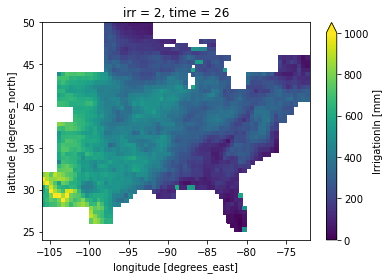

In [429]:
#use campaign nc file in run010
#use campaign file in created C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\data\campaign\created_campaign\test6 folder (this is the right one)
#for the following factor configuration:

#scen_new:0,irr:0 GS dry
#scen_new:1,irr:0 SS dry
#scen_new:2,irr:0 FSPS dry
#scen_new:3,irr:0 FS dry
#scen_new:0,irr:1 GS irrigated
#scen_new:1,irr:1 SS irrigated
#scen_new:2,irr:1 FSPS irrigated
#scen_new:3,irr:1 FS irrigated

df_final.IrrigationIn[25,3,1,0:,0:].plot(yincrease=True, x='lon', y='lat', vmin=0, vmax=1000)

## Work with multidimensional dataframes using xarray

In [430]:
# replace all values equal to -99 with np.nan
dataPre4 = df_final.where(df_final['biomass'] != -99.)
dataPre3 = dataPre4.where(dataPre4['RainIn'] != 0.)

#remove data from West Virginia state which was out of bioenergy crop mask
d1 = dataPre3.where(dataPre3.biomass != dataPre3.biomass[0:,0:,0:,49,24], drop=True)
d2 = d1.where(d1.biomass != d1.biomass[0:,0:,0:,50,24], drop=True)
d3 = d2.where(d2.biomass != d2.biomass[0:,0:,0:,47,23], drop=True)
d4 = d3.where(d3.biomass != d3.biomass[0:,0:,0:,48,23], drop=True)
d5 = d4.where(d4.biomass != d4.biomass[0:,0:,0:,49,23], drop=True)
d6 = d5.where(d5.biomass != d5.biomass[0:,0:,0:,50,23], drop=True)
d7 = d6.where(d6.biomass != d6.biomass[0:,0:,0:,51,23], drop=True)
d8 = d7.where(d7.biomass != d7.biomass[0:,0:,0:,48,22], drop=True)
d9 = d8.where(d8.biomass != d8.biomass[0:,0:,0:,49,22], drop=True)
d10 = d9.where(d9.biomass != d9.biomass[0:,0:,0:,50,22], drop=True)
d11 = d10.where(d10.biomass != d10.biomass[0:,0:,0:,51,22], drop=True)
d12 = d11.where(d11.biomass != d11.biomass[0:,0:,0:,52,22], drop=True)
d13 = d12.where(d12.biomass != d12.biomass[0:,0:,0:,53,22], drop=True)
d14 = d13.where(d13.biomass != d13.biomass[0:,0:,0:,49,21], drop=True)
d15 = d14.where(d14.biomass != d14.biomass[0:,0:,0:,50,21], drop=True)
d16 = d15.where(d15.biomass != d15.biomass[0:,0:,0:,51,21], drop=True)
d17 = d16.where(d16.biomass != d16.biomass[0:,0:,0:,52,21], drop=True)
d18 = d17.where(d17.biomass != d17.biomass[0:,0:,0:,53,21], drop=True)
d19 = d18.where(d18.biomass != d18.biomass[0:,0:,0:,54,21], drop=True)
data4 = d19.where(d19.biomass != d19.biomass[0:,0:,0:,50,20], drop=True)

#Create biomass variable in t ha-1
data4['biomass2']=data4['biomass']/1000

In [452]:
#Conver multidimendional frame to 2D frame
data4pd = data4.to_dataframe()
dfc = data4pd[data4pd.biomass != 0]
dfc.reset_index(level=[0,1,2,3], inplace=True)
dfc.rename(columns={'scen_new':'cultivar'}, inplace=True)
df = dfc.dropna()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [458]:
df.irr.unique()

array([1, 2], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

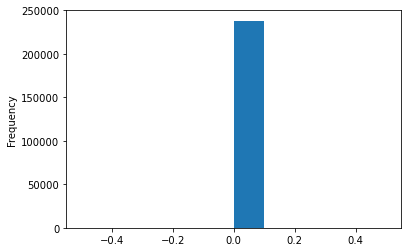

In [462]:
df2 = df.loc[df['irr'] == 1]
df2.IrrigationIn.plot.hist()

In [438]:
#df["irrigation"] = ["rainfed" if ele < 2 else "irrigated" for ele in df["cultivar"]]

C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
<ipython-input-467-4646b084ddbe>:50: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


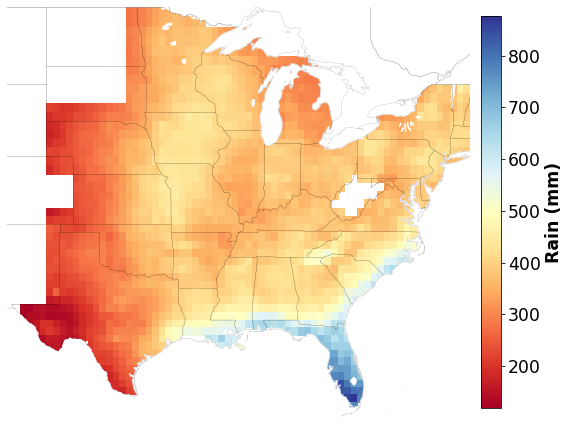

In [467]:
#Plotting single map with mean accum rain
a = df.groupby(['lat', 'lon'],as_index=False).mean()
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=-95)),figsize=(10,8))

p=data4.RainIn.mean(dim=('time','scen_new','irr'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdYlBu, add_colorbar=False, zorder=1, vmin=a.RainIn.quantile(0), vmax=a.RainIn.quantile(1))

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=False,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='k',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, color='k', linewidth=0.1)
ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, color='grey', linewidth=0.1)
ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([-100, -90, -80])
gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'k'}
gl.ylabel_style = {'size': 10, 'color': 'k'}

for value in iso3 :
    area(ax, value, "white")

area(ax, value, "white")

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Rain (mm)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\rain.png', dpi=600, bbox_inches='tight', pad_inches=0)

hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
<ipython-input-433-44119a7c7f0b>:49: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


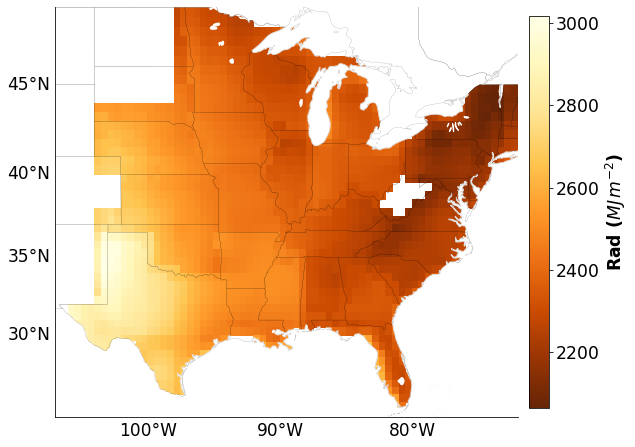

In [433]:
#Plotting single map with mean accum radiation
a = df.groupby(['lat', 'lon'],as_index=False).mean()
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=-95)),figsize=(10,8))

p=data4.RadiationIn.mean(dim=('time','scen_new','irr'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.YlOrBr_r, add_colorbar=False, zorder=1, vmin=a.RadiationIn.quantile(0), vmax=a.RadiationIn.quantile(1))
def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=True,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='white',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, color='k', linewidth=0.1)
ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, color='grey', linewidth=0.1)
ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([-100, -90, -80])
gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 17, 'color': 'k'}
gl.ylabel_style = {'size': 17, 'color': 'k'}

for value in iso3 :
    area(ax, value, "white")

area(ax, value, "white")

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Rad ($MJ\,m^{-2}$)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)
ax.spines['left'].set_visible(True)  
ax.spines['bottom'].set_visible(True)

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\rad.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
<ipython-input-434-ead141ac9dd2>:50: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


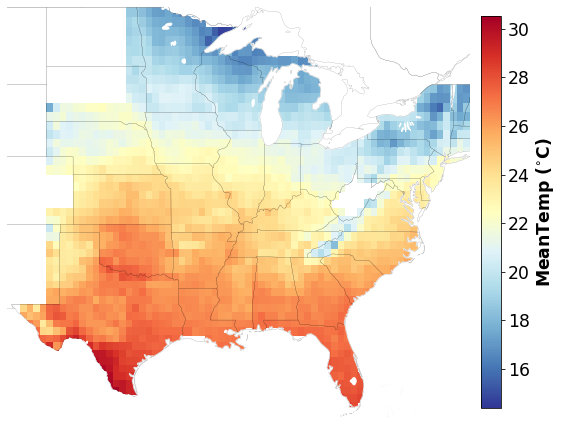

In [434]:
#Plotting single map with mean temperature during the growing cycle
a = df.groupby(['lat', 'lon'],as_index=False).mean()
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=-95)),figsize=(10,8))

p=data4.TempIn.mean(dim=('time','scen_new','irr'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdYlBu_r, zorder=1, add_colorbar=False, vmin=a.TempIn.quantile(0), vmax=a.TempIn.quantile(1))

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=False,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='white',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, color='k', linewidth=0.1)
ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, color='grey', linewidth=0.1)
ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([-100, -90, -80])
gl.ylocator = mticker.FixedLocator([30, 35,40, 45])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'k'}
gl.ylabel_style = {'size': 10, 'color': 'k'}

for value in iso3 :
    area(ax, value, "white")

area(ax, value, "white")

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='MeanTemp ($^{\circ}$C)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\temp.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-437-65e0178d98ba>:52: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


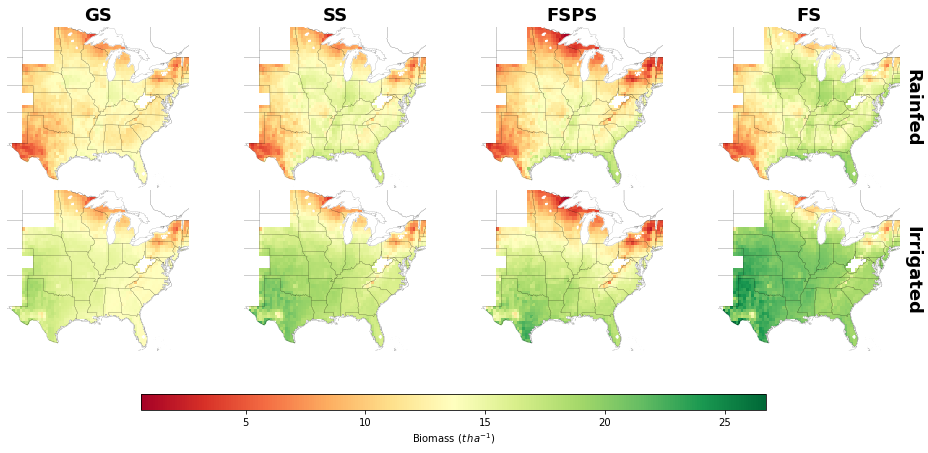

In [437]:
#Plotting mean biomass
a = df.groupby(['lat', 'lon','cultivar','irr'],as_index=False).mean()
map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.biomass2.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', row='irr', col='scen_new',
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, #=a.biomass2.min(),vmax=a.biomass2.max(),
    figsize=(16,8),
    cmap=mpl.cm.RdYlGn,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("FSPS", fontsize=18, fontweight="bold")    
axes[3].set_title("FS", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                      draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, color='k')
    ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, color='k',linewidth=0.1)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False
    
    for value in iso3 :
        area(ax, value, "white")

#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.3, hspace=0)
p.add_colorbar(orientation='horizontal', pad=0.1, shrink=0.7, aspect=40, label='Biomass ($t\,ha^{-1}$)')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\mean_biomass.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-463-cd618aab381a>:52: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


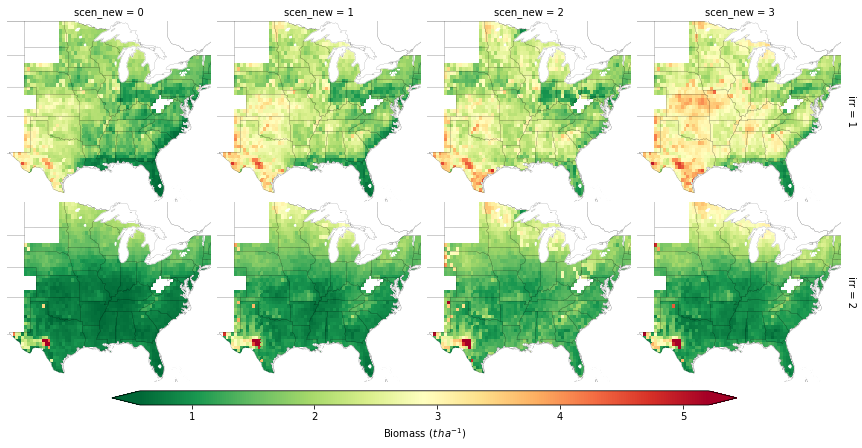

In [463]:
#Plotting mean biomass
a = df.groupby(['lat', 'lon','cultivar','irr'],as_index=False).std()
map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.biomass2.std(dim=('time'), skipna=True).plot(x='lon', y='lat', row='irr', col='scen_new',
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=a.biomass2.quantile(0.001),vmax=a.biomass2.quantile(0.999),
    figsize=(16,8), #rasterized=True,
    cmap=mpl.cm.RdYlGn_r,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

#Edit title of columns and rows
#axes = p.axes.flatten()
#axes[0].set_title("GS", fontsize=18, fontweight="bold")
#axes[1].set_title("SS", fontsize=18, fontweight="bold")
#axes[2].set_title("FSPS", fontsize=18, fontweight="bold")    
#axes[3].set_title("FS", fontsize=18, fontweight="bold")

#irri_labels =  ["","","","Rainfed","","","","Irrigated"]

#for i, ax in enumerate(p.axes.flat):
#    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                      draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, color='k')
    ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, color='k',linewidth=0.1)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False
    for value in iso3 :
        area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=-0.2, hspace=0)
p.add_colorbar(orientation='horizontal', pad=0.02, shrink=0.7, aspect=40, label='Biomass ($t\,ha^{-1}$)')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\mean_biomass.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

In [464]:
a = df.groupby(['lat', 'lon','cultivar','irr'],as_index=False).count()
a

lat    lon  cultivar  irr  DaysAfterSowing  ExtinctionCoef  \
0      25.25 -81.25         0    1               30              30   
1      25.25 -81.25         0    2               30              30   
2      25.25 -81.25         1    1               30              30   
3      25.25 -81.25         1    2               30              30   
4      25.25 -81.25         2    1               30              30   
...      ...    ...       ...  ...              ...             ...   
15923  49.75 -92.25         1    2               30              30   
15924  49.75 -92.25         2    1               30              30   
15925  49.75 -92.25         2    2               30              30   
15926  49.75 -92.25         3    1               30              30   
15927  49.75 -92.25         3    2               30              30   

       FertiliserIn  FloweringDAS  IrrigationIn  LeafNo  ...  WU  aMaxT  \
0                30            30            30      30  ...  30     30   
1                30            30            30      30  ...  30     30   
2                30            30            30      30  ...  30     30   
3                30            30            30      30  ...  30     30   
4                30            30            30      30  ...  30     30   
...             ...           ...           ...     ...  ...  ..    ...   
15923            30            30            30      30  ...  30     30   
15924            30            30            30      30  ...  30     30   
15925            30            30            30      30  ...  30     30   
15926            30            30            30      30  ...  30     30   
15927            30            30            30      30  ...  30     30   

       aMinT  actual_ET  biomass  planting_date  potential_ET  radInt  scen  \
0         30         30       30             30            30      30    30   
1         30         30       30             30            30      30    30   
2         30         30       30             30            30      30    30   
3         30         30       30             30            30      30    30   
4         30         30       30             30            30      30    30   
...      ...        ...      ...            ...           ...     ...   ...   
15923     30         30       30             30            30      30    30   
15924     30         30       30             30            30      30    30   
15925     30         30       30             30            30      30    30   
15926     30         30       30             30            30      30    30   
15927     30         30       30             30            30      30    30   

       biomass2  
0            30  
1            30  
2            30  
3            30  
4            30  
...         ...  
15923        30  
15924        30  
15925        30  
15926        30  
15927        30  

[15928 rows x 25 columns]

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-465-78fe00d5a8a2>:52: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


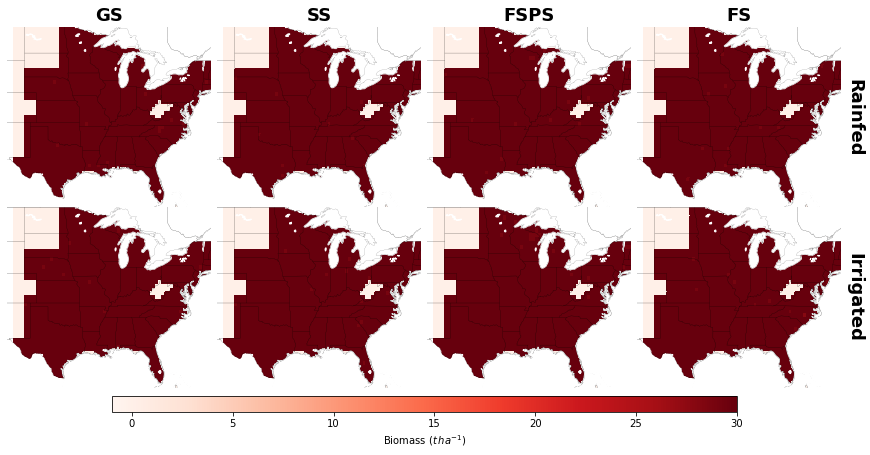

In [465]:
#Plotting mean biomass
a = df.groupby(['lat', 'lon','cultivar','irr'],as_index=False).count()
map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.biomass2.count(dim=('time')).plot(x='lon', y='lat', row='irr', col='scen_new',
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1,vmax=30,
    figsize=(16,8),
    cmap=mpl.cm.Reds,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("FSPS", fontsize=18, fontweight="bold")    
axes[3].set_title("FS", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                      draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, color='k')
    ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, color='k',linewidth=0.1)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False
    for value in iso3 :
        area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=-0.2, hspace=0)
p.add_colorbar(orientation='horizontal', pad=0.02, shrink=0.7, aspect=40, label='Biomass ($t\,ha^{-1}$)')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\years.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

In [468]:
a = df.groupby(['lat', 'lon','cultivar','irr'],as_index=False).mean()
a.FloweringDAS.max()

109.43333435058594

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-469-19c3393ace1a>:52: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


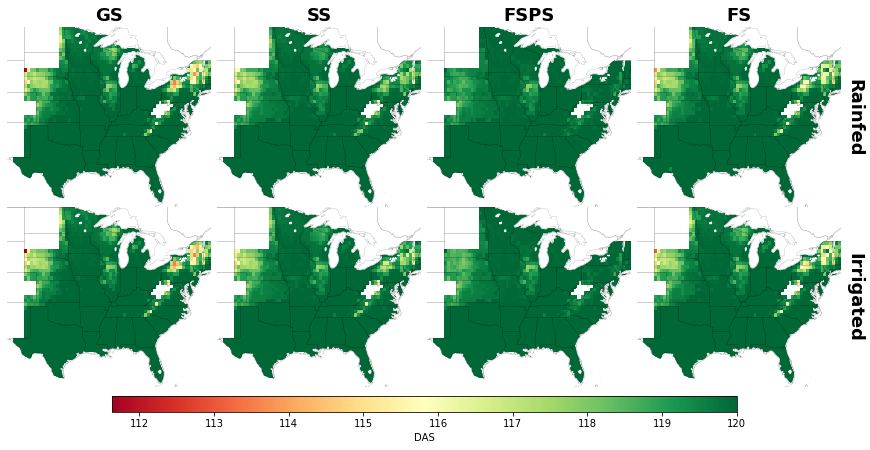

In [469]:
#Plotting mean biomass
a = df.groupby(['lat', 'lon','cultivar','irr'],as_index=False).mean()
map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.DaysAfterSowing.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', row='irr', col='scen_new',
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=a.DaysAfterSowing.min(),vmax=a.DaysAfterSowing.max(),
    figsize=(16,8),
    cmap=mpl.cm.RdYlGn,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("FSPS", fontsize=18, fontweight="bold")    
axes[3].set_title("FS", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                      draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, color='k')
    ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, color='k',linewidth=0.1)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False
    for value in iso3 :
        area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=-0.2, hspace=0)
p.add_colorbar(orientation='horizontal', pad=0.02, shrink=0.7, aspect=40, label='DAS')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\DAS.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-470-55d4e75ff422>:52: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


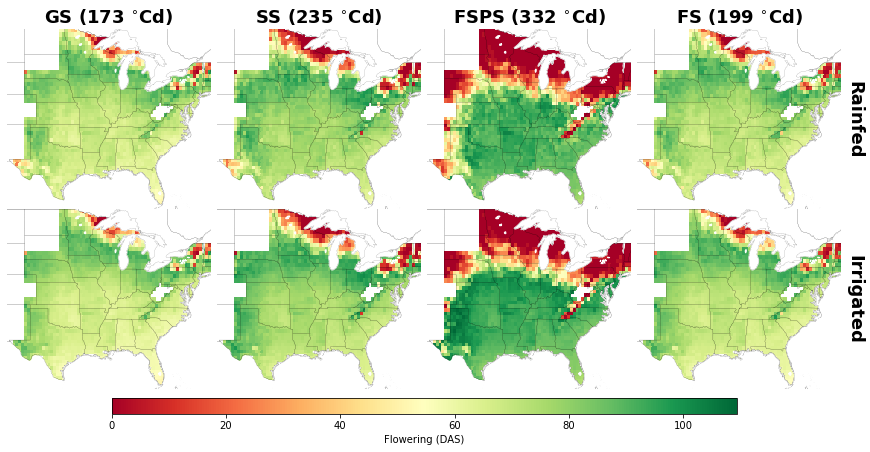

In [470]:
#Plotting mean biomass
a = df.groupby(['lat', 'lon','cultivar','irr'],as_index=False).mean()
map_proj = ccrs.Mercator(central_longitude=-95)

p = data4.FloweringDAS.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', row='irr', col='scen_new',
    transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=a.FloweringDAS.min(),vmax=a.FloweringDAS.max(),
    figsize=(16,8),
    cmap=mpl.cm.RdYlGn,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Biomass ($kg\,ha^{-1}$)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS (173 $^{\circ}$Cd)", fontsize=18, fontweight="bold")
axes[1].set_title("SS (235 $^{\circ}$Cd)", fontsize=18, fontweight="bold")
axes[2].set_title("FSPS (332 $^{\circ}$Cd)", fontsize=18, fontweight="bold")    
axes[3].set_title("FS (199 $^{\circ}$Cd)", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                      draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, color='k')
    ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, color='k',linewidth=0.1)
    ax.set_extent([-107, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False
    for value in iso3 :
        area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=-0.2, hspace=0)
p.add_colorbar(orientation='horizontal', pad=0.02, shrink=0.7, aspect=40, label='Flowering (DAS)')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\Flowering.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

## Work with 2D pandas dataframe and correlations

In [471]:
#Conver multidimendional frame to 2D frame
data4pd = data4.to_dataframe()
df = data4pd[data4pd.biomass != 0]
df.reset_index(level=[0,1,2,3,4], inplace=True)

#Change name of column
df.rename(columns={'scen_new':'cultivar'}, inplace=True)

C:\Users\uqjojeda\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [472]:
var1.columns

Index(['irr', 'lat', 'lon', 'cultivar', 'DaysAfterSowing', 'FertiliserIn',
       'FloweringDAS', 'IrrigationIn', 'LeafNo', 'MaxLAI', 'PAWC',
       'RadiationIn', 'RainIn', 'TempIn', 'WU', 'aMaxT', 'aMinT', 'actual_ET',
       'biomass', 'planting_date', 'potential_ET', 'radInt', 'scen',
       'biomass2'],
      dtype='object')

In [473]:
#Export data for Variance Decomposition Analysis
dfa = df.dropna()
var1 = dfa.groupby(['irr', 'lat', 'lon', 'cultivar'],as_index=False).mean()

var=var1.drop(['DaysAfterSowing', 'actual_ET', 'planting_date', 'scen','aMaxT','aMinT','potential_ET', 'radInt',
              'IrrigationIn','WU','FloweringDAS','LeafNo','MaxLAI','FertiliserIn'], axis=1)

#var.to_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\tmp\var.csv')

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-474-0e98bc41966d>:75: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


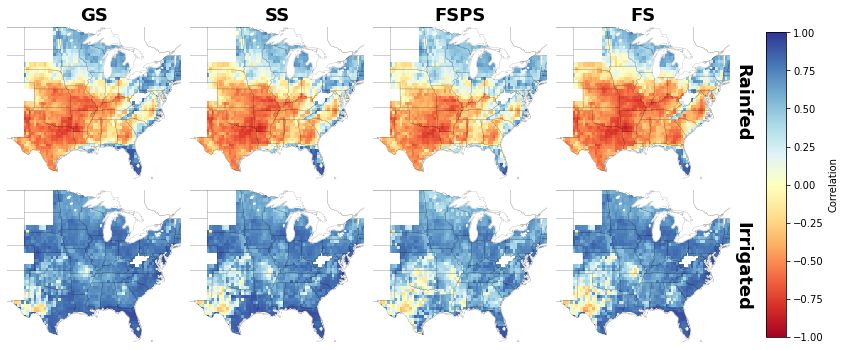

In [474]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='RadiationIn'
x='biomass'

#Set index
dfa = df.set_index(['lat','lon','cultivar','irr'])

a=dfa.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4','biomass'], axis=1)
#Drop duplicates
e = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon', 'cultivar', 'irr'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

#Plotting standar deviation of biomass (specify name of variable to plot!!!!! p = corr."TempIn".plot)

map_proj = ccrs.Mercator(central_longitude=-95)

p = corr.RadiationIn.plot(x='lon', y='lat', col='cultivar', row='irr', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1, vmax=1,
    figsize=(16,8),
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "correlation"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("FSPS", fontsize=18, fontweight="bold")    
axes[3].set_title("FS", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                      draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, color='k')
    ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, color='k',linewidth=0.1)
    ax.set_extent([-107.5, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False
    for value in iso3 :
        area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.05, hspace=-0.4)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=15, label='Correlation')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\radcorr.png', dpi=600, bbox_inches='tight', pad_inches=0)

hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-475-31c6880ae0a4>:78: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


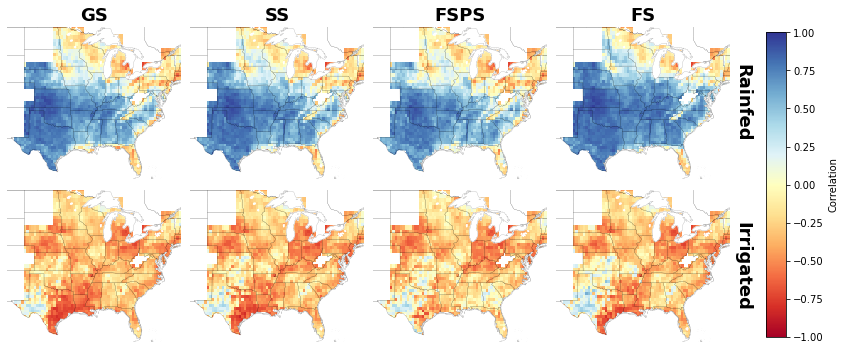

In [475]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='RainIn'
x='biomass'

#Set index
dfa = df.set_index(['lat','lon','cultivar','irr'])

a=dfa.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4','biomass'], axis=1)
#Drop duplicates
e = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon', 'cultivar', 'irr'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

#Plotting standar deviation of biomass (specify name of variable to plot!!!!! p = corr."TempIn".plot)

map_proj = ccrs.Mercator(central_longitude=-95)

p = corr.RainIn.plot(x='lon', y='lat', col='cultivar', row='irr', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1, vmax=1,
    figsize=(16,8),
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "correlation"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for value in iso3 :
    area(ax, value, "white")

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("FSPS", fontsize=18, fontweight="bold")    
axes[3].set_title("FS", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                      draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, color='k')
    ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, color='k',linewidth=0.1)
    ax.set_extent([-107.5, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False
    area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.05, hspace=-0.4)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=15, label='Correlation')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\radcorr.png', dpi=600, bbox_inches='tight', pad_inches=0)

hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-476-2ccc13e6af69>:78: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


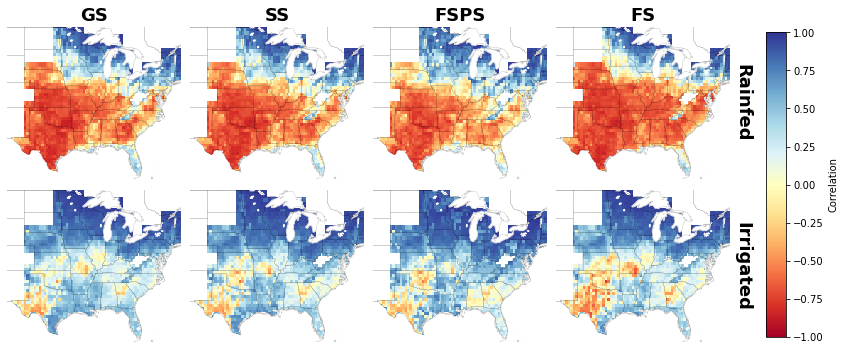

In [476]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='TempIn'
x='biomass'

#Set index
dfa = df.set_index(['lat','lon','cultivar','irr'])

a=dfa.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4','biomass'], axis=1)
#Drop duplicates
e = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon', 'cultivar', 'irr'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

#Plotting standar deviation of biomass (specify name of variable to plot!!!!! p = corr."TempIn".plot)

map_proj = ccrs.Mercator(central_longitude=-95)

p = corr.TempIn.plot(x='lon', y='lat', col='cultivar', row='irr', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1, vmax=1,
    figsize=(16,8),
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "correlation"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for value in iso3 :
    area(ax, value, "white")

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("FSPS", fontsize=18, fontweight="bold")    
axes[3].set_title("FS", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                      draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, color='k')
    ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, color='k',linewidth=0.1)
    ax.set_extent([-107.5, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False
    area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.05, hspace=-0.4)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=15, label='Correlation')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\radcorr.png', dpi=600, bbox_inches='tight', pad_inches=0)

hide_toggle()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
<ipython-input-478-8312814f1d44>:77: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


C:\Users\uqjojeda\Anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


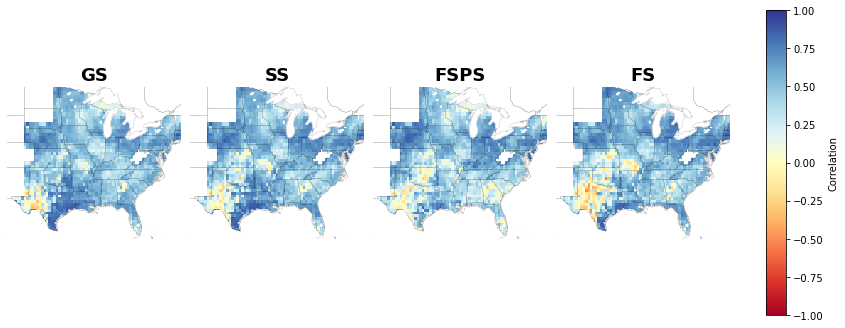

In [478]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='IrrigationIn'
x='biomass'

#Set index
dfa = df.set_index(['lat','lon','cultivar','irr'])

a=dfa.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4','biomass'], axis=1)
#Drop duplicates
e = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon', 'cultivar', 'irr'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

#Plotting standar deviation of biomass (specify name of variable to plot!!!!! p = corr."TempIn".plot)

map_proj = ccrs.Mercator(central_longitude=-95)

p = corr.IrrigationIn.plot(x='lon', y='lat', col='cultivar', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1, vmax=1,
    figsize=(16,8), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "correlation"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

#Edit title of columns and rows
axes = p.axes.flatten()
axes[0].set_title("GS", fontsize=18, fontweight="bold")
axes[1].set_title("SS", fontsize=18, fontweight="bold")
axes[2].set_title("FSPS", fontsize=18, fontweight="bold")    
axes[3].set_title("FS", fontsize=18, fontweight="bold")

irri_labels =  ["","","","Rainfed","","","","Irrigated"]

for i, ax in enumerate(p.axes.flat):
    plt.setp(ax.texts, text=irri_labels[i], fontsize=18, fontweight="bold")

#Edit other features of the map
for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                      draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE, color='k')
    ax.add_feature(cfeature.STATES, linewidth=0.1, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.add_feature(cfeature.BORDERS, color='k',linewidth=0.1)
    ax.set_extent([-107.5, -72, 24.5, 49], crs=ccrs.PlateCarree())
    ax.outline_patch.set_visible(False)
    gl.top_labels = False
    gl.right_labels = False
    for value in iso3 :
        area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0.05, hspace=0)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=15, label='Correlation')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\irricorr.png', dpi=600, bbox_inches='tight', pad_inches=0)
hide_toggle()

## Heatmap and correlations

In [491]:
#Read dataframe with env names
X= pd.read_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\data\dfenv.csv')

#Merge current dataset to include envs
new = pd.merge(X, df, how ='inner', on =['lat','lon']) 
dfa2=new.drop(['RadiationIn_y','TempIn_y','RainIn_y','biomass_x'], axis=1)
dfa2.rename(columns={'RadiationIn_x':'RadiationIn','TempIn_x':'TempIn','RainIn_x':'RainIn','biomass_y':'biomass'}, inplace=True)
dfa3 = dfa2.dropna()

In [493]:
a = new.loc[new['irr'] == 1]
a.IrrigationIn.describe()

count    232880.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: IrrigationIn, dtype: float64

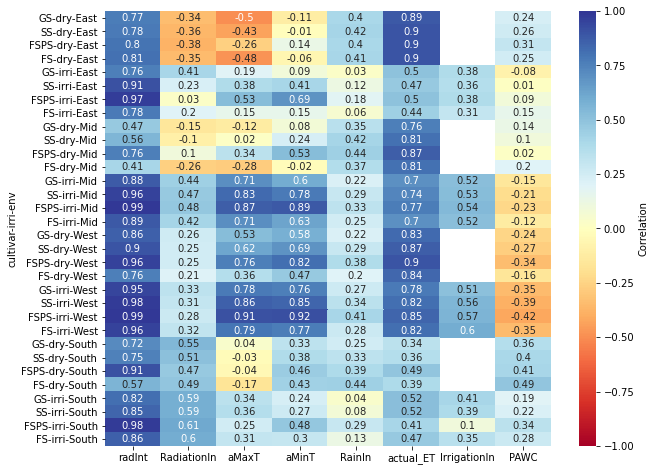

In [504]:
#Create filters and rearrange dataframes
A = dfa3.loc[dfa3['env_name'] == 'East']
B = dfa3.loc[dfa3['env_name'] == 'Mid']
C = dfa3.loc[dfa3['env_name'] == 'West']
D = dfa3.loc[dfa3['env_name'] == 'South']

Adry = A.loc[A['irr'] == 1]
Airri = A.loc[A['irr'] == 2]
Bdry = B.loc[B['irr'] == 1]
Birri = B.loc[B['irr'] == 2]
Cdry = C.loc[C['irr'] == 1]
Cirri = C.loc[C['irr'] == 2]
Ddry = D.loc[D['irr'] == 1]
Dirri = D.loc[D['irr'] == 2]

AGSd = Adry.loc[Adry['cultivar'] == 0]
ASSd = Adry.loc[Adry['cultivar'] == 1]
AFSPSd = Adry.loc[Adry['cultivar'] == 2]
AFSd = Adry.loc[Adry['cultivar'] == 3]
AGSi = Airri.loc[Airri['cultivar'] == 0]
ASSi = Airri.loc[Airri['cultivar'] == 1]
AFSPSi = Airri.loc[Airri['cultivar'] == 2]
AFSi = Airri.loc[Airri['cultivar'] == 3]

BGSd = Bdry.loc[Bdry['cultivar'] == 0]
BSSd = Bdry.loc[Bdry['cultivar'] == 1]
BFSPSd = Bdry.loc[Bdry['cultivar'] == 2]
BFSd = Bdry.loc[Bdry['cultivar'] == 3]
BGSi = Birri.loc[Birri['cultivar'] == 0]
BSSi = Birri.loc[Birri['cultivar'] == 1]
BFSPSi = Birri.loc[Birri['cultivar'] == 2]
BFSi = Birri.loc[Birri['cultivar'] == 3]

CGSd = Cdry.loc[Cdry['cultivar'] == 0]
CSSd = Cdry.loc[Cdry['cultivar'] == 1]
CFSPSd = Cdry.loc[Cdry['cultivar'] == 2]
CFSd = Cdry.loc[Cdry['cultivar'] == 3]
CGSi = Cirri.loc[Cirri['cultivar'] == 0]
CSSi = Cirri.loc[Cirri['cultivar'] == 1]
CFSPSi = Cirri.loc[Cirri['cultivar'] == 2]
CFSi = Cirri.loc[Cirri['cultivar'] == 3]

DGSd = Ddry.loc[Ddry['cultivar'] == 0]
DSSd = Ddry.loc[Ddry['cultivar'] == 1]
DFSPSd = Ddry.loc[Ddry['cultivar'] == 2]
DFSd = Ddry.loc[Ddry['cultivar'] == 3]
DGSi = Dirri.loc[Dirri['cultivar'] == 0]
DSSi = Dirri.loc[Dirri['cultivar'] == 1]
DFSPSi = Dirri.loc[Dirri['cultivar'] == 2]
DFSi = Dirri.loc[Dirri['cultivar'] == 3]

AGSdcorr = AGSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
AGSdcorr['cultivar'] = 'GS'
AGSdcorr['irri'] = 'dry'
AGSdcorr['env'] = 'East'
AFSdcorr = AFSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
AFSdcorr['cultivar'] = 'FS'
AFSdcorr['irri'] = 'dry'
AFSdcorr['env'] = 'East'
ASSdcorr = ASSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
ASSdcorr['cultivar'] = 'SS'
ASSdcorr['irri'] = 'dry'
ASSdcorr['env'] = 'East'
AFSPSdcorr = AFSPSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
AFSPSdcorr['cultivar'] = 'FSPS'
AFSPSdcorr['irri'] = 'dry'
AFSPSdcorr['env'] = 'East'

AGSicorr = AGSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
AGSicorr['cultivar'] = 'GS'
AGSicorr['irri'] = 'irri'
AGSicorr['env'] = 'East'
AFSicorr = AFSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
AFSicorr['cultivar'] = 'FS'
AFSicorr['irri'] = 'irri'
AFSicorr['env'] = 'East'
ASSicorr = ASSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
ASSicorr['cultivar'] = 'SS'
ASSicorr['irri'] = 'irri'
ASSicorr['env'] = 'East'
AFSPSicorr = AFSPSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
AFSPSicorr['cultivar'] = 'FSPS'
AFSPSicorr['irri'] = 'irri'
AFSPSicorr['env'] = 'East'

BGSdcorr = BGSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
BGSdcorr['cultivar'] = 'GS'
BGSdcorr['irri'] = 'dry'
BGSdcorr['env'] = 'Mid'
BFSdcorr = BFSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
BFSdcorr['cultivar'] = 'FS'
BFSdcorr['irri'] = 'dry'
BFSdcorr['env'] = 'Mid'
BSSdcorr = BSSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
BSSdcorr['cultivar'] = 'SS'
BSSdcorr['irri'] = 'dry'
BSSdcorr['env'] = 'Mid'
BFSPSdcorr = BFSPSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
BFSPSdcorr['cultivar'] = 'FSPS'
BFSPSdcorr['irri'] = 'dry'
BFSPSdcorr['env'] = 'Mid'

BGSicorr = BGSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
BGSicorr['cultivar'] = 'GS'
BGSicorr['irri'] = 'irri'
BGSicorr['env'] = 'Mid'
BFSicorr = BFSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
BFSicorr['cultivar'] = 'FS'
BFSicorr['irri'] = 'irri'
BFSicorr['env'] = 'Mid'
BSSicorr = BSSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
BSSicorr['cultivar'] = 'SS'
BSSicorr['irri'] = 'irri'
BSSicorr['env'] = 'Mid'
BFSPSicorr = BFSPSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
BFSPSicorr['cultivar'] = 'FSPS'
BFSPSicorr['irri'] = 'irri'
BFSPSicorr['env'] = 'Mid'

CGSdcorr = CGSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
CGSdcorr['cultivar'] = 'GS'
CGSdcorr['irri'] = 'dry'
CGSdcorr['env'] = 'West'
CFSdcorr = CFSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
CFSdcorr['cultivar'] = 'FS'
CFSdcorr['irri'] = 'dry'
CFSdcorr['env'] = 'West'
CSSdcorr = CSSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
CSSdcorr['cultivar'] = 'SS'
CSSdcorr['irri'] = 'dry'
CSSdcorr['env'] = 'West'
CFSPSdcorr = CFSPSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
CFSPSdcorr['cultivar'] = 'FSPS'
CFSPSdcorr['irri'] = 'dry'
CFSPSdcorr['env'] = 'West'

CGSicorr = CGSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
CGSicorr['cultivar'] = 'GS'
CGSicorr['irri'] = 'irri'
CGSicorr['env'] = 'West'
CFSicorr = CFSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
CFSicorr['cultivar'] = 'FS'
CFSicorr['irri'] = 'irri'
CFSicorr['env'] = 'West'
CSSicorr = CSSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
CSSicorr['cultivar'] = 'SS'
CSSicorr['irri'] = 'irri'
CSSicorr['env'] = 'West'
CFSPSicorr = CFSPSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
CFSPSicorr['cultivar'] = 'FSPS'
CFSPSicorr['irri'] = 'irri'
CFSPSicorr['env'] = 'West'

DGSdcorr = DGSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
DGSdcorr['cultivar'] = 'GS'
DGSdcorr['irri'] = 'dry'
DGSdcorr['env'] = 'South'
DFSdcorr = DFSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
DFSdcorr['cultivar'] = 'FS'
DFSdcorr['irri'] = 'dry'
DFSdcorr['env'] = 'South'
DSSdcorr = DSSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
DSSdcorr['cultivar'] = 'SS'
DSSdcorr['irri'] = 'dry'
DSSdcorr['env'] = 'South'
DFSPSdcorr = DFSPSd.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
DFSPSdcorr['cultivar'] = 'FSPS'
DFSPSdcorr['irri'] = 'dry'
DFSPSdcorr['env'] = 'South'

DGSicorr = DGSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
DGSicorr['cultivar'] = 'GS'
DGSicorr['irri'] = 'irri'
DGSicorr['env'] = 'South'
DFSicorr = DFSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
DFSicorr['cultivar'] = 'FS'
DFSicorr['irri'] = 'irri'
DFSicorr['env'] = 'South'
DSSicorr = DSSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
DSSicorr['cultivar'] = 'SS'
DSSicorr['irri'] = 'irri'
DSSicorr['env'] = 'South'
DFSPSicorr = DFSPSi.corr().loc[['biomass'],['radInt','RadiationIn','aMaxT','aMinT','RainIn','actual_ET','IrrigationIn','PAWC']]
DFSPSicorr['cultivar'] = 'FSPS'
DFSPSicorr['irri'] = 'irri'
DFSPSicorr['env'] = 'South'

frames = [AGSdcorr,ASSdcorr,AFSPSdcorr,AFSdcorr,AGSicorr,ASSicorr,AFSPSicorr,AFSicorr,
          BGSdcorr,BSSdcorr,BFSPSdcorr,BFSdcorr,BGSicorr,BSSicorr,BFSPSicorr,BFSicorr,
          CGSdcorr,CSSdcorr,CFSPSdcorr,CFSdcorr,CGSicorr,CSSicorr,CFSPSicorr,CFSicorr,
          DGSdcorr,DSSdcorr,DFSPSdcorr,DFSdcorr,DGSicorr,DSSicorr,DFSPSicorr,DFSicorr]

corr = pd.concat(frames)
corr.reset_index(level=[0], inplace=True)

df_final=corr.drop(['index'], axis=1)
df1 = df_final.set_index(['cultivar','irri','env'])
df2 = df1.round(decimals=2)

#Plot heatmap
fig= plt.figure(figsize=(10,8))
sns.heatmap(df2, annot=True, cmap='RdYlBu',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\figs\corr.png', dpi=300, bbox_inches='tight', pad_inches=0)

hide_toggle()

In [505]:
df_corr = df2.reset_index()

In [506]:
df_corr2 = df_corr.set_index(['cultivar','irri'])

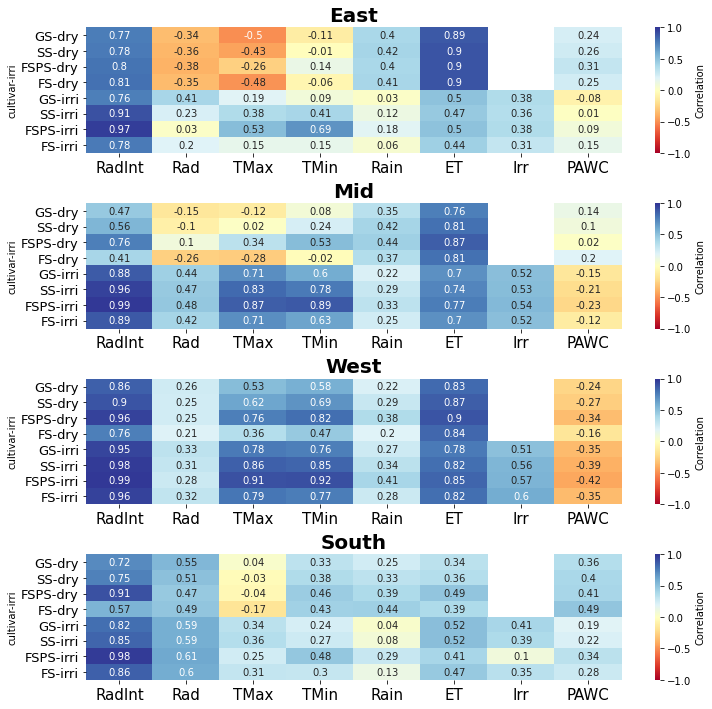

In [507]:
df_corr2.rename(columns={'RadiationIn':'Rad','aMaxT':'TMax','aMinT':'TMin',
                        'RainIn':'Rain','actual_ET':'ET','IrrigationIn':'Irr','radInt':'RadInt'}, inplace=True)

A = df_corr2.loc[df_corr2['env'] == 'East']
A2 = A.drop(['env'], axis=1)
B = df_corr2.loc[df_corr2['env'] == 'Mid']
B2 = B.drop(['env'], axis=1)
C = df_corr2.loc[df_corr2['env'] == 'West']
C2 = C.drop(['env'], axis=1)
D = df_corr2.loc[df_corr2['env'] == 'South']
D2 = D.drop(['env'], axis=1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12,12))
sns.heatmap(A2, ax=ax1, annot=True, cmap='RdYlBu',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})
sns.heatmap(B2, ax=ax2, annot=True, cmap='RdYlBu',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})
sns.heatmap(C2, ax=ax3, annot=True, cmap='RdYlBu',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})
sns.heatmap(D2, ax=ax4, annot=True, cmap='RdYlBu',vmin=-1, vmax=1,
        cbar_kws={
        "orientation": "vertical",
        "shrink": 1,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Correlation"})

ax1.set_title('East', fontweight='bold', size=20)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=13)

ax2.set_title('Mid', fontweight='bold', size=20)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=13)

ax3.set_title('West', fontweight='bold', size=20)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=13)

ax4.set_title('South', fontweight='bold', size=20)
ax4.xaxis.set_tick_params(labelsize=15)
ax4.yaxis.set_tick_params(labelsize=13)

plt.subplots_adjust(wspace=0, hspace=0.4)
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\corr.png', dpi=300, bbox_inches='tight', pad_inches=0)
hide_toggle()

## Others

C:\Users\uqjojeda\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\uqjojeda\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

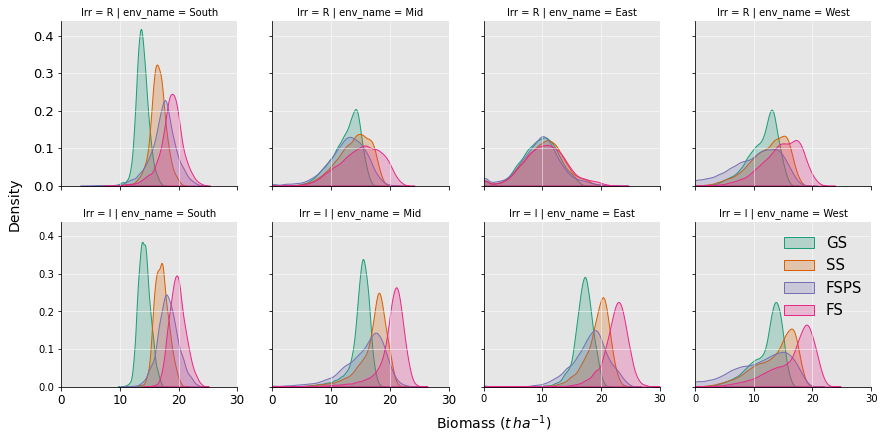

In [508]:
#Density plot#

dfa3.loc[dfa3.cultivar == 0, 'cv'] = "GS"
dfa3.loc[dfa3.cultivar == 1, 'cv'] = "SS"
dfa3.loc[dfa3.cultivar == 2, 'cv'] = "FSPS"
dfa3.loc[dfa3.cultivar == 3, 'cv'] = "FS"

dfa3.loc[dfa3.irr == 1, 'Irr'] = "R"
dfa3.loc[dfa3.irr == 2, 'Irr'] = "I"

g = sns.FacetGrid(dfa3, col="env_name", row='Irr', hue="cv",hue_order= ['GS','SS','FSPS','FS'], sharey=True, height=3,
                  aspect=1, palette='Dark2')

g.map(sns.kdeplot,"biomass2",shade=True)

g.add_legend(fontsize=15,title=False,bbox_to_anchor=(0.90, 0.35))
g.set_xlabels("")
axes = g.axes.flatten()

axes[0].yaxis.set_tick_params(labelsize=13)
axes[3].yaxis.set_tick_params(labelsize=13)
axes[3].set_xlim(0,30)
axes[3].xaxis.set_tick_params(labelsize=12)
axes[3].xaxis.set_major_locator(ticker.MultipleLocator(10))
axes[4].set_xlim(0,30)
axes[4].xaxis.set_tick_params(labelsize=12)
axes[4].xaxis.set_major_locator(ticker.MultipleLocator(10))
axes[5].set_xlim(0,30)
axes[5].xaxis.set_tick_params(labelsize=12)
axes[5].xaxis.set_major_locator(ticker.MultipleLocator(10))

axes[0].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[0].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[0].patch.set_facecolor('0.90')
axes[1].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[1].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[1].patch.set_facecolor('0.90')
axes[2].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[2].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[2].patch.set_facecolor('0.90')
axes[3].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[3].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[3].patch.set_facecolor('0.90')
axes[4].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[4].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[4].patch.set_facecolor('0.90')
axes[5].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[5].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[5].patch.set_facecolor('0.90')
axes[6].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[6].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[6].patch.set_facecolor('0.90')
axes[7].grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
axes[7].grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
axes[7].patch.set_facecolor('0.90')

g.fig.text(0.5, 0, 'Biomass ($t\,ha^{-1}$)', ha='center', fontsize =14)
g.fig.text(-0.01, 0.52, 'Density', va='center', rotation='vertical', fontsize =14)
g.fig.subplots_adjust(wspace=0.2, hspace=0.22)

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\density.png', dpi=300, bbox_inches='tight', pad_inches=0)
hide_toggle()

<ipython-input-67-dd75683abfc7>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


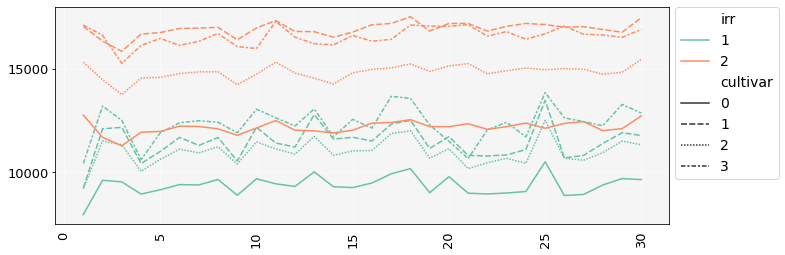

In [67]:
#Biomass vs year#

fig= plt.figure(figsize=(11,4))

ax=plt.subplot(1, 1, 1)

ax = sns.lineplot(x="time", y="biomass",hue="irr", style="cultivar", estimator=np.mean, data=df,
                  ci=95, err_style="band", palette='Set2')

# Formatting graph and background
plt.legend(prop=dict(size=14),bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.ylabel('', fontsize =15)
plt.xlabel('', fontsize =25)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=13)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(5000))
#ax.set_ylim([10.1,21.9])
#ax.set_xlim([1979.5,2009.5])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

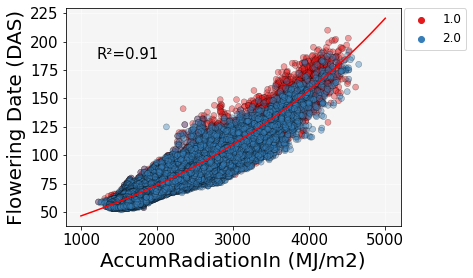

In [70]:
from pylab import *
from scipy.optimize import curve_fit
kwargs  =   {'edgecolor':"k"}

df0 = df.where(df['FloweringDAS'] != 0)
df1 = df0.where(df['RadiationIn'] != 0)
df_flo = df1.dropna()

#Create filters and rearrange dataframes
dry = df_flo.loc[df_flo['irr'] == 1]
irri = df_flo.loc[df_flo['irr'] == 2]

#Grouping
GS = df_flo.loc[df_flo['cultivar'] == 0]
FS = df_flo.loc[df_flo['cultivar'] == 1]
SS = df_flo.loc[df_flo['cultivar'] == 2]
FSPS = df_flo.loc[df_flo['cultivar'] == 3]

GSd = dry.loc[dry['cultivar'] == 0]
FSd = dry.loc[dry['cultivar'] == 1]
SSd = dry.loc[dry['cultivar'] == 2]
FSPSd = dry.loc[dry['cultivar'] == 3]

GSi = irri.loc[irri['cultivar'] == 0]
FSi = irri.loc[irri['cultivar'] == 1]
SSi = irri.loc[irri['cultivar'] == 2]
FSPSi = irri.loc[irri['cultivar'] == 3]

x =GSd.RadiationIn.values
y =GSd.FloweringDAS.values

def func(x, a, c, d):
    return a*np.exp(-c*x)+d

popt, pcov = curve_fit(func, x, y, p0=(1, 1e-6, 1))

xx = np.linspace(1000, 5000, 500)
yy = func(xx, *popt)
sns.scatterplot(x='RadiationIn', y='FloweringDAS', hue='irr', data=GS, palette='Set1', **kwargs, alpha=0.4)
plot(xx, yy, color='r')

residuals = y- func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
r2=str(r_squared.round(2))
plt.text(1200, 185,'R²='+r2,fontsize=15,color='k')

plt.legend(prop=dict(size=12),bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)
plt.xlabel('AccumRadiationIn (MJ/m2)', fontsize =20)
plt.ylabel('Flowering Date (DAS)', fontsize =20)

ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

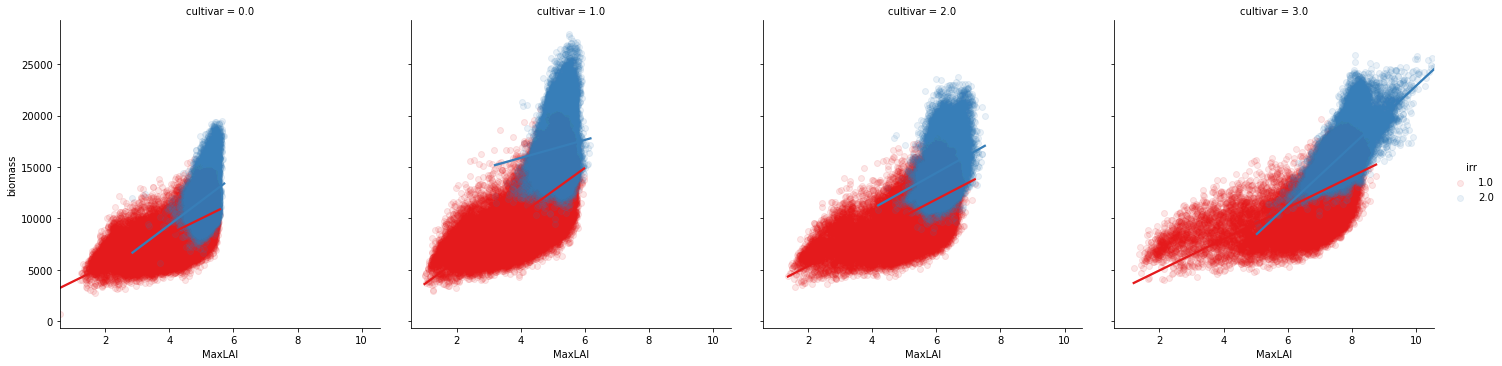

In [71]:
sns.lmplot(x="MaxLAI", y="biomass",hue='irr',col='cultivar', data=df_flo, palette='Set1',scatter_kws={'alpha':0.1})
plt.subplots_adjust(wspace=0.1, hspace=0)

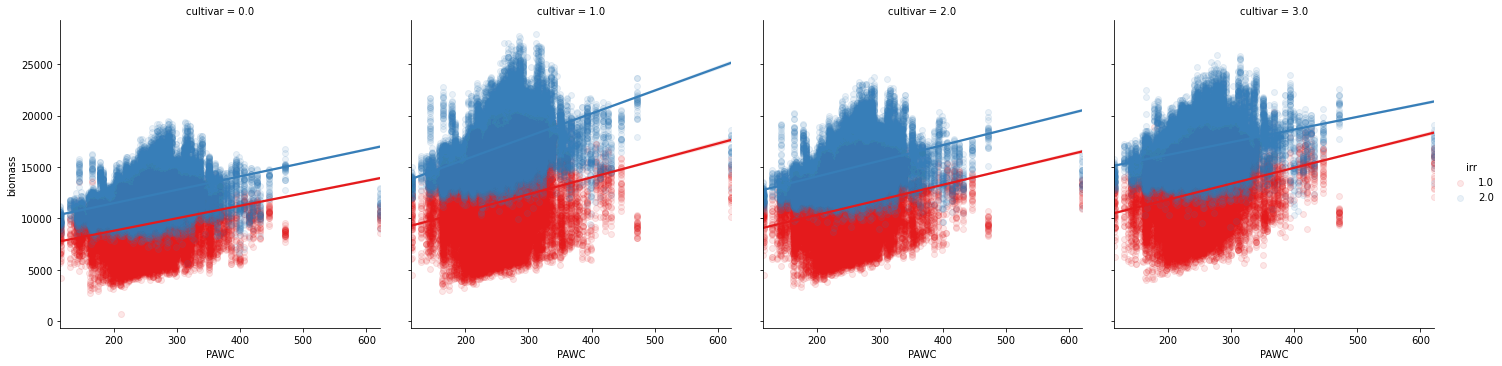

In [72]:
sns.lmplot(x="PAWC", y="biomass",hue='irr',col='cultivar', data=df_flo, palette='Set1',scatter_kws={'alpha':0.1})
plt.subplots_adjust(wspace=0.1, hspace=0)

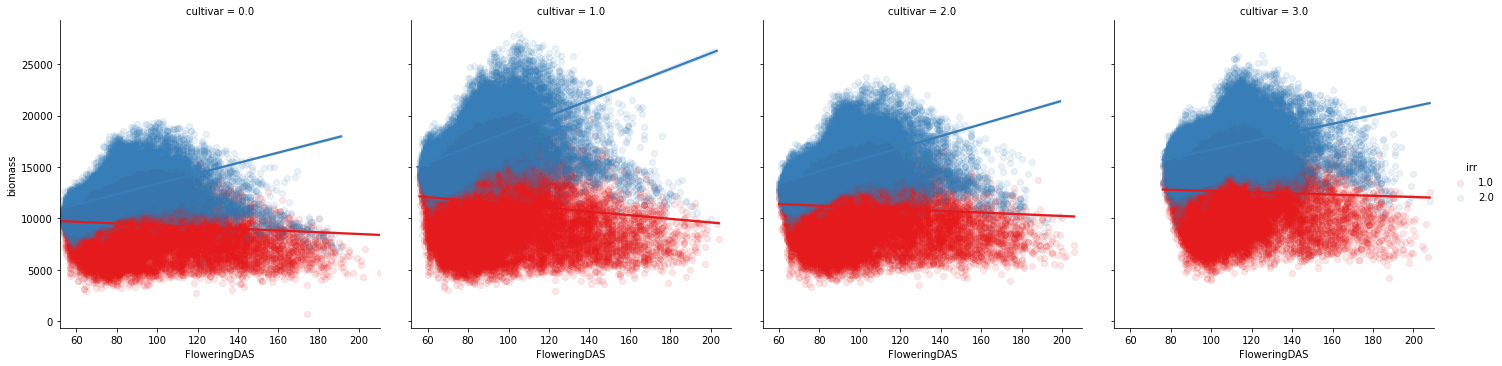

In [73]:
sns.lmplot(x="FloweringDAS", y="biomass",hue='irr',col='cultivar', data=df_flo, palette='Set1',scatter_kws={'alpha':0.1})
plt.subplots_adjust(wspace=0.1, hspace=0)

<AxesSubplot:xlabel='cultivar', ylabel='FloweringDAS'>

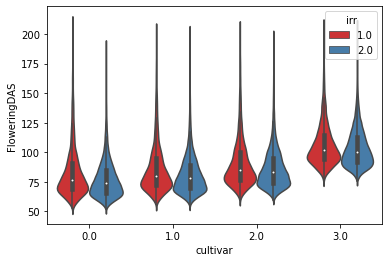

In [74]:
kwargs  =   {'edgecolor':"k"}
sns.violinplot(x="cultivar", y="FloweringDAS",hue='irr', data=df_flo, palette='Set1')

In [75]:
#sns.pairplot(df_mean, hue='cultivar', vars=['biomass', 'yield','IrrigationIn', 'FloweringDAS', 'MaxLAI', 'RainIn', 'TempIn', 'RadiationIn',
#       'WaterUse', 'actual_ET'])

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


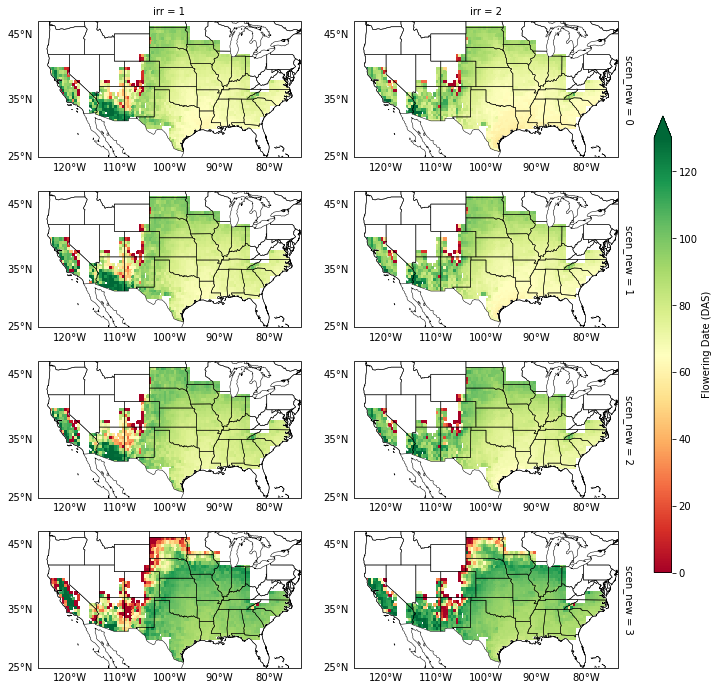

In [76]:
#Plotting FloweringDas

map_proj = ccrs.Mercator(central_longitude=-95)

p = data2.FloweringDAS.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', col='irr', row='scen_new', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=0, vmax=130,
    figsize=(13,12), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlGn,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Flowering Date (DAS)"}, zorder=1)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=True,dms=True, x_inline=False, y_inline=False)
    ax.coastlines(color='black',linewidth=0.5, zorder=4)
    ax.add_feature(cfeature.STATES,linewidth=0.5, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    area(ax, value, "white")
    gl.top_labels = False
    gl.left_labels = True
    gl.right_labels =False
    gl.xlines = False
    gl.ylines = False
    gl.xlocator = mticker.FixedLocator([-120, -110, -100, -90, -80])
    gl.ylocator = mticker.FixedLocator([25, 35, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}
    
for value in iso3 :
    area(ax, value, "white")
    
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\seminars\20201214 UQ meeting\figs\biomass_all.png', dpi=300, bbox_inches='tight', pad_inches=0)

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


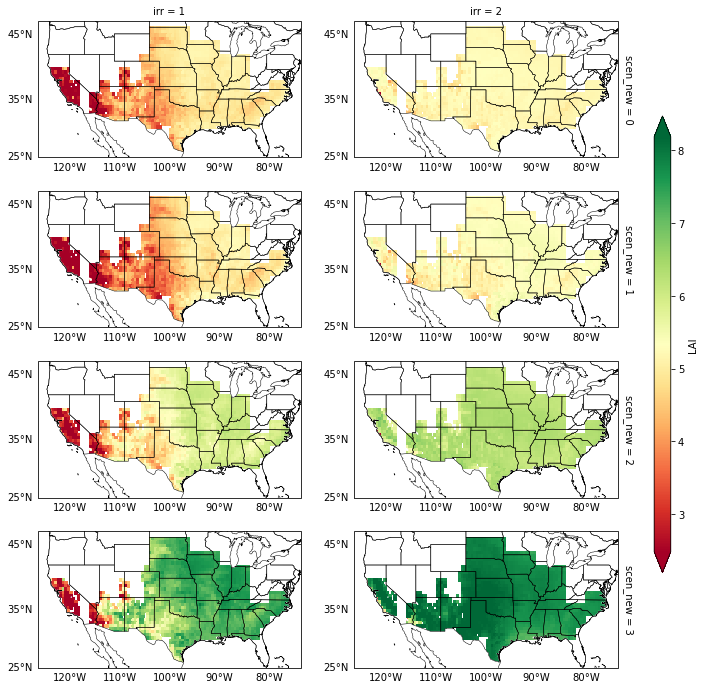

In [77]:
#Plotting MaxLAI

map_proj = ccrs.Mercator(central_longitude=-95)

p = data2.MaxLAI.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', col='irr', row='scen_new', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, #vmin=7000, vmax=20000,
    figsize=(13,12), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlGn,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "LAI"}, zorder=1)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=True,dms=True, x_inline=False, y_inline=False)
    ax.coastlines(color='black',linewidth=0.5, zorder=4)
    ax.add_feature(cfeature.STATES,linewidth=0.5, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    area(ax, value, "white")
    gl.top_labels = False
    gl.left_labels = True
    gl.right_labels =False
    gl.xlines = False
    gl.ylines = False
    gl.xlocator = mticker.FixedLocator([-120, -110, -100, -90, -80])
    gl.ylocator = mticker.FixedLocator([25, 35, 45])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}
    
for value in iso3 :
    area(ax, value, "white")
    
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\seminars\20201214 UQ meeting\figs\biomass_all.png', dpi=300, bbox_inches='tight', pad_inches=0)

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


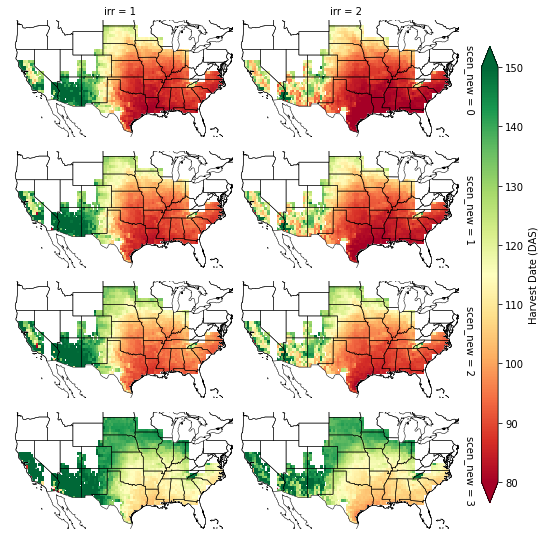

In [78]:
#Plotting biomass

map_proj = ccrs.Mercator(central_longitude=-95)

p = data2.DaysAfterSowing.mean(dim=('time'), skipna=True).plot(x='lon', y='lat', col='irr', row='scen_new', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=80, vmax=150,
    figsize=(10,12), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlGn,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "Harvest Date (DAS)"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for value in iso3 :
    area(ax, value, "white")

for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.coastlines(color='black',linewidth=0.5, zorder=4)
    ax.add_feature(cfeature.STATES,linewidth=0.5, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.axis("off")
    area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0, hspace=-0.5)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=25, label='Harvest Date (DAS)')
    
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\seminars\20201214 UQ meeting\figs\biomass_all.png', dpi=300, bbox_inches='tight', pad_inches=0)

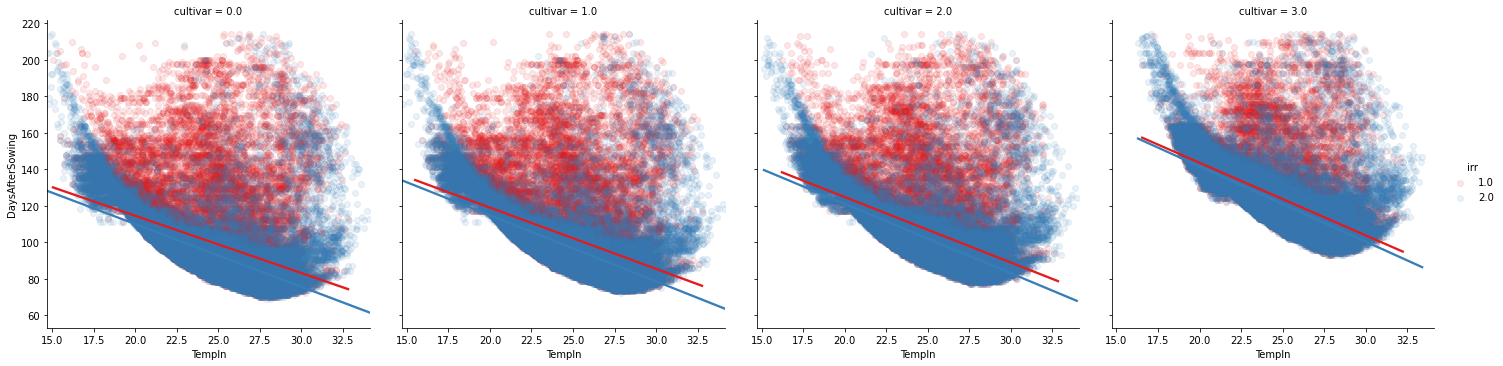

In [79]:
sns.lmplot(x="TempIn", y="DaysAfterSowing",hue='irr',col='cultivar', data=df_flo, palette='Set1',scatter_kws={'alpha':0.1})
plt.subplots_adjust(wspace=0.1, hspace=0)

C:\Users\uqjojeda\Anaconda3\lib\site-packages\xarray\plot\facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


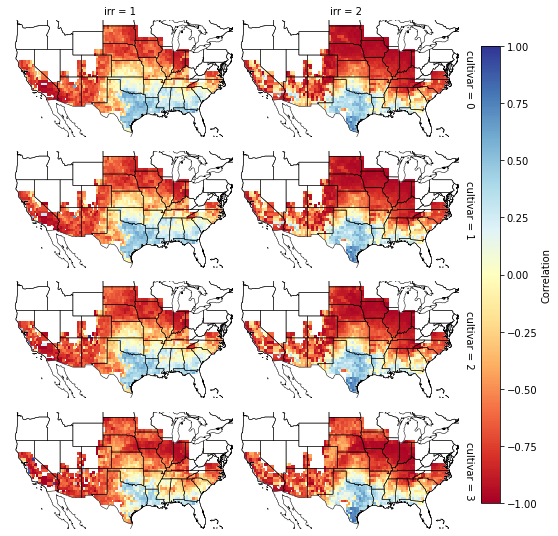

In [80]:
#Calculate correlation between defined variables (specify y variable!!!!!!)
y='TempIn'
x='DaysAfterSowing'

#Set index
dfa = df.set_index(['lat','lon','cultivar','irr'])

a=dfa.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4','DaysAfterSowing'], axis=1)
#Drop duplicates
e = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Set indexes
e.set_index(['lat', 'lon', 'cultivar', 'irr'], inplace=True)

#From 2D dataframe to xarray
corr = e.to_xarray()

#Plotting standar deviation of biomass (specify name of variable to plot!!!!! p = corr."TempIn".plot)

map_proj = ccrs.Mercator(central_longitude=-95)

p = corr.TempIn.plot(x='lon', y='lat', col='irr', row='cultivar', transform=ccrs.PlateCarree(central_longitude=0),
    subplot_kws={'projection': map_proj}, vmin=-1, vmax=1,
    figsize=(10,12), #rasterized=True
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlBu,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.7,
        "aspect": 25,
        "pad": 0.05, #distance of colorbar to plot
        "label": "correlation"}, zorder=1, add_colorbar=False, label=False)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

for value in iso3 :
    area(ax, value, "white")

for ax in p.axes.flat:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=False,dms=True, x_inline=False, y_inline=False)
    ax.coastlines(color='black',linewidth=0.5, zorder=4)
    ax.add_feature(cfeature.STATES,linewidth=0.5, zorder=3)
    ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
    ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
    ax.axis("off")
    area(ax, value, "white")
#    gl.top_labels = False
#    gl.left_labels = True
#    gl.right_labels =False
#    gl.xlines = False
#    gl.ylines = False
#    gl.xlocator = mticker.FixedLocator([]) #-120, -100, -80
#    gl.ylocator = mticker.FixedLocator([]) #25, 35, 45
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    gl.xlabel_style = {'size': 10, 'color': 'k'}
#    gl.ylabel_style = {'size': 10, 'color': 'k'}

#Adjust colorbar and subplots
plt.subplots_adjust(wspace=0, hspace=-0.5)
p.add_colorbar(orientation='vertical', pad=0.04, shrink=0.7, aspect=25, label='Correlation')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\figs\biomass_all.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [81]:
#Plot correlations using scatter plot and basemap
#Calculate correlation between defined variables
""""
x='biomass'
y='RainIn'

a=df1.groupby(['lat','lon','cultivar','irr'])[[x,y]].corr()

#Drop nan values
b = a.dropna()
#Reset index
c = b.reset_index()
#Remove columns
d = c.drop(['level_4','biomass'], axis=1)
#Drop duplicates
df = d.drop_duplicates(['lat','lon','cultivar', 'irr'], keep= 'first')

#Create list of values for mapping using scatter plot

GSd = df[(df.cultivar == 0) & (df.irr == 1)]
GSd_lon = GSd['lon'].values
GSd_lat = GSd['lat'].values
GSd_y = GSd[y].values

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import os
os.environ["PROJ_LIB"] = r'C:\Users\uqjojeda\Anaconda3\Library\share'
from mpl_toolkits.basemap import Basemap

fig= plt.figure(figsize=(12,5))

ax=plt.subplot(1, 1, 1)
# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', llcrnrlon=-125, llcrnrlat=24, urcrnrlon=-75, urcrnrlat=47, resolution='l')
#m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawmapboundary(fill_color='white')
m.drawstates(color="k", linewidth=0.5)
m.drawcoastlines(color="k", linewidth=0.5)
m.drawcountries(color="k", linewidth=0.5)
# labels = [left,right,top,bottom]
parallels = (25,35,45)
m.drawparallels(parallels,labels=[True,True,True],linewidth=0,size=14)
meridians = (-80, -90,-100,-110, -120)
m.drawmeridians(meridians,labels=[True,True,True,True,True],linewidth=0,size=14)
# plot points using color for heat data and size for altitude
m.scatter(GSd_lon, GSd_lat, latlon=True, c=GSd_y, alpha=1, s=35, cmap='RdYlBu', linewidths=0, zorder=1, marker=',')

# create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.02, pad=0.1)
cb.set_label(label='correlation', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')
plt.clim(-1, 1)
cb.set_alpha(1)
cb.draw_all()
#cb.remove()

#ax.set_title('BrC (242)',fontsize= 20,weight='bold') 
#ax.title.set_position([0.5,1.06])
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\harvest\TT\2_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-81-4c46144ab673>, line 61)